In [3]:


import tensorflow as tf
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras.utils import np_utils
from keras.preprocessing import image
from matplotlib import pyplot as plt
from PIL import Image

%matplotlib inline



C:\Users\abhis\AppData\Local\Temp/ipykernel_13380/626476266.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainDataFrame['ClassId'][i] = '0' + trainDataFrame['ClassId'][i]
C:\Users\abhis\AppData\Local\Temp/ipykernel_13380/626476266.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testDataFrame['ClassId'][i] = '0' + testDataFrame['ClassId'][i]


20 Train/20/00020_00000_00020.png


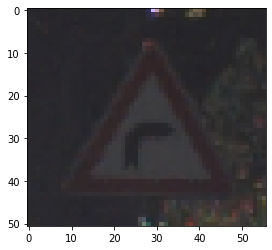

In [4]:

trainDataFrame = pd.read_csv('E:\Documents\Programming Projects\Python\Trafic sign Deep Learning\Train.csv')
testDataFrame = pd.read_csv('E:\Documents\Programming Projects\Python\Trafic sign Deep Learning\Test.csv')

trainDataFrame['ClassId'] = trainDataFrame['ClassId'].astype(str)
testDataFrame['ClassId'] = testDataFrame['ClassId'].astype(str)

for i in range(0, len(trainDataFrame['ClassId'])):
    if len(trainDataFrame['ClassId'][i]) == 1:
        trainDataFrame['ClassId'][i] = '0' + trainDataFrame['ClassId'][i]
for i in range(0, len(testDataFrame['ClassId'])):
    if len(testDataFrame['ClassId'][i]) == 1:
        testDataFrame['ClassId'][i] = '0' + testDataFrame['ClassId'][i]

print(trainDataFrame['ClassId'][20], trainDataFrame['Path'][20])
img = Image.open('E:\Documents\Programming Projects\Python\Trafic sign Deep Learning\\' + trainDataFrame['Path'][20])
plt.imshow(img)

In [5]:
trainDataGen = image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2
)
testDataGen = image.ImageDataGenerator(
    rescale=1./255
)

trainDataGenerator = trainDataGen.flow_from_dataframe(
    dataframe=trainDataFrame,
    directory='E:\Documents\Programming Projects\Python\Trafic sign Deep Learning',
    x_col='Path',
    y_col='ClassId',
    target_size=(32, 32),
    batch_size=128,
    class_mode='categorical'
)
testDataGenerator = testDataGen.flow_from_dataframe(
    dataframe=testDataFrame,
    directory='E:\Documents\Programming Projects\Python\Trafic sign Deep Learning',
    x_col='Path',
    y_col='ClassId',
    target_size=(32, 32),
    batch_size=16,
    class_mode='categorical'
)

Found 39209 validated image filenames belonging to 43 classes.
Found 12630 validated image filenames belonging to 43 classes.


In [7]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(43, activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 14400)             0         
                                                                 
 dense (Dense)               (None, 64)                921664    
                                                                 
 dense_1 (Dense)             (None, 43)                2795      
                                                                 
Total params: 926,251
Trainable params: 926,251
Non-trainable params: 0
__________________________________________________

In [ ]:
history = model.fit(trainDataGenerator, epochs=30, verbose=1)

Epoch 1/30
 20/307 [>.............................] - ETA: 12:00 - loss: 3.4546 - accuracy: 0.1449

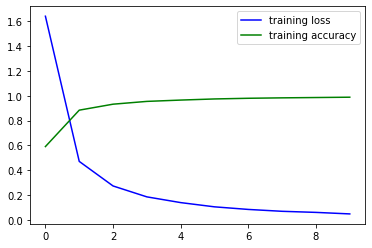

In [8]:
loss = history.history['loss']
# val_loss = history.history['val_loss']
acc = history.history['accuracy']
# val_acc = history.history['val_acc']
epoches = range(0, len(loss))
plt.plot(epoches, loss, 'b', label='training loss')
# plt.plot(epoches, val_loss, 'b-', label='validation loss')
plt.plot(epoches, acc, 'g', label='training accuracy')
# plt.plot(epoches, val_acc, 'g-', label='validation accuracy')
plt.legend()
plt.show()

In [8]:
model.evaluate(testDataGenerator, verbose=1)

790/790 [==============================] - 8s 10ms/step - loss: 0.5229 - accuracy: 0.8934


[0.5228591561317444, 0.8934283256530762]

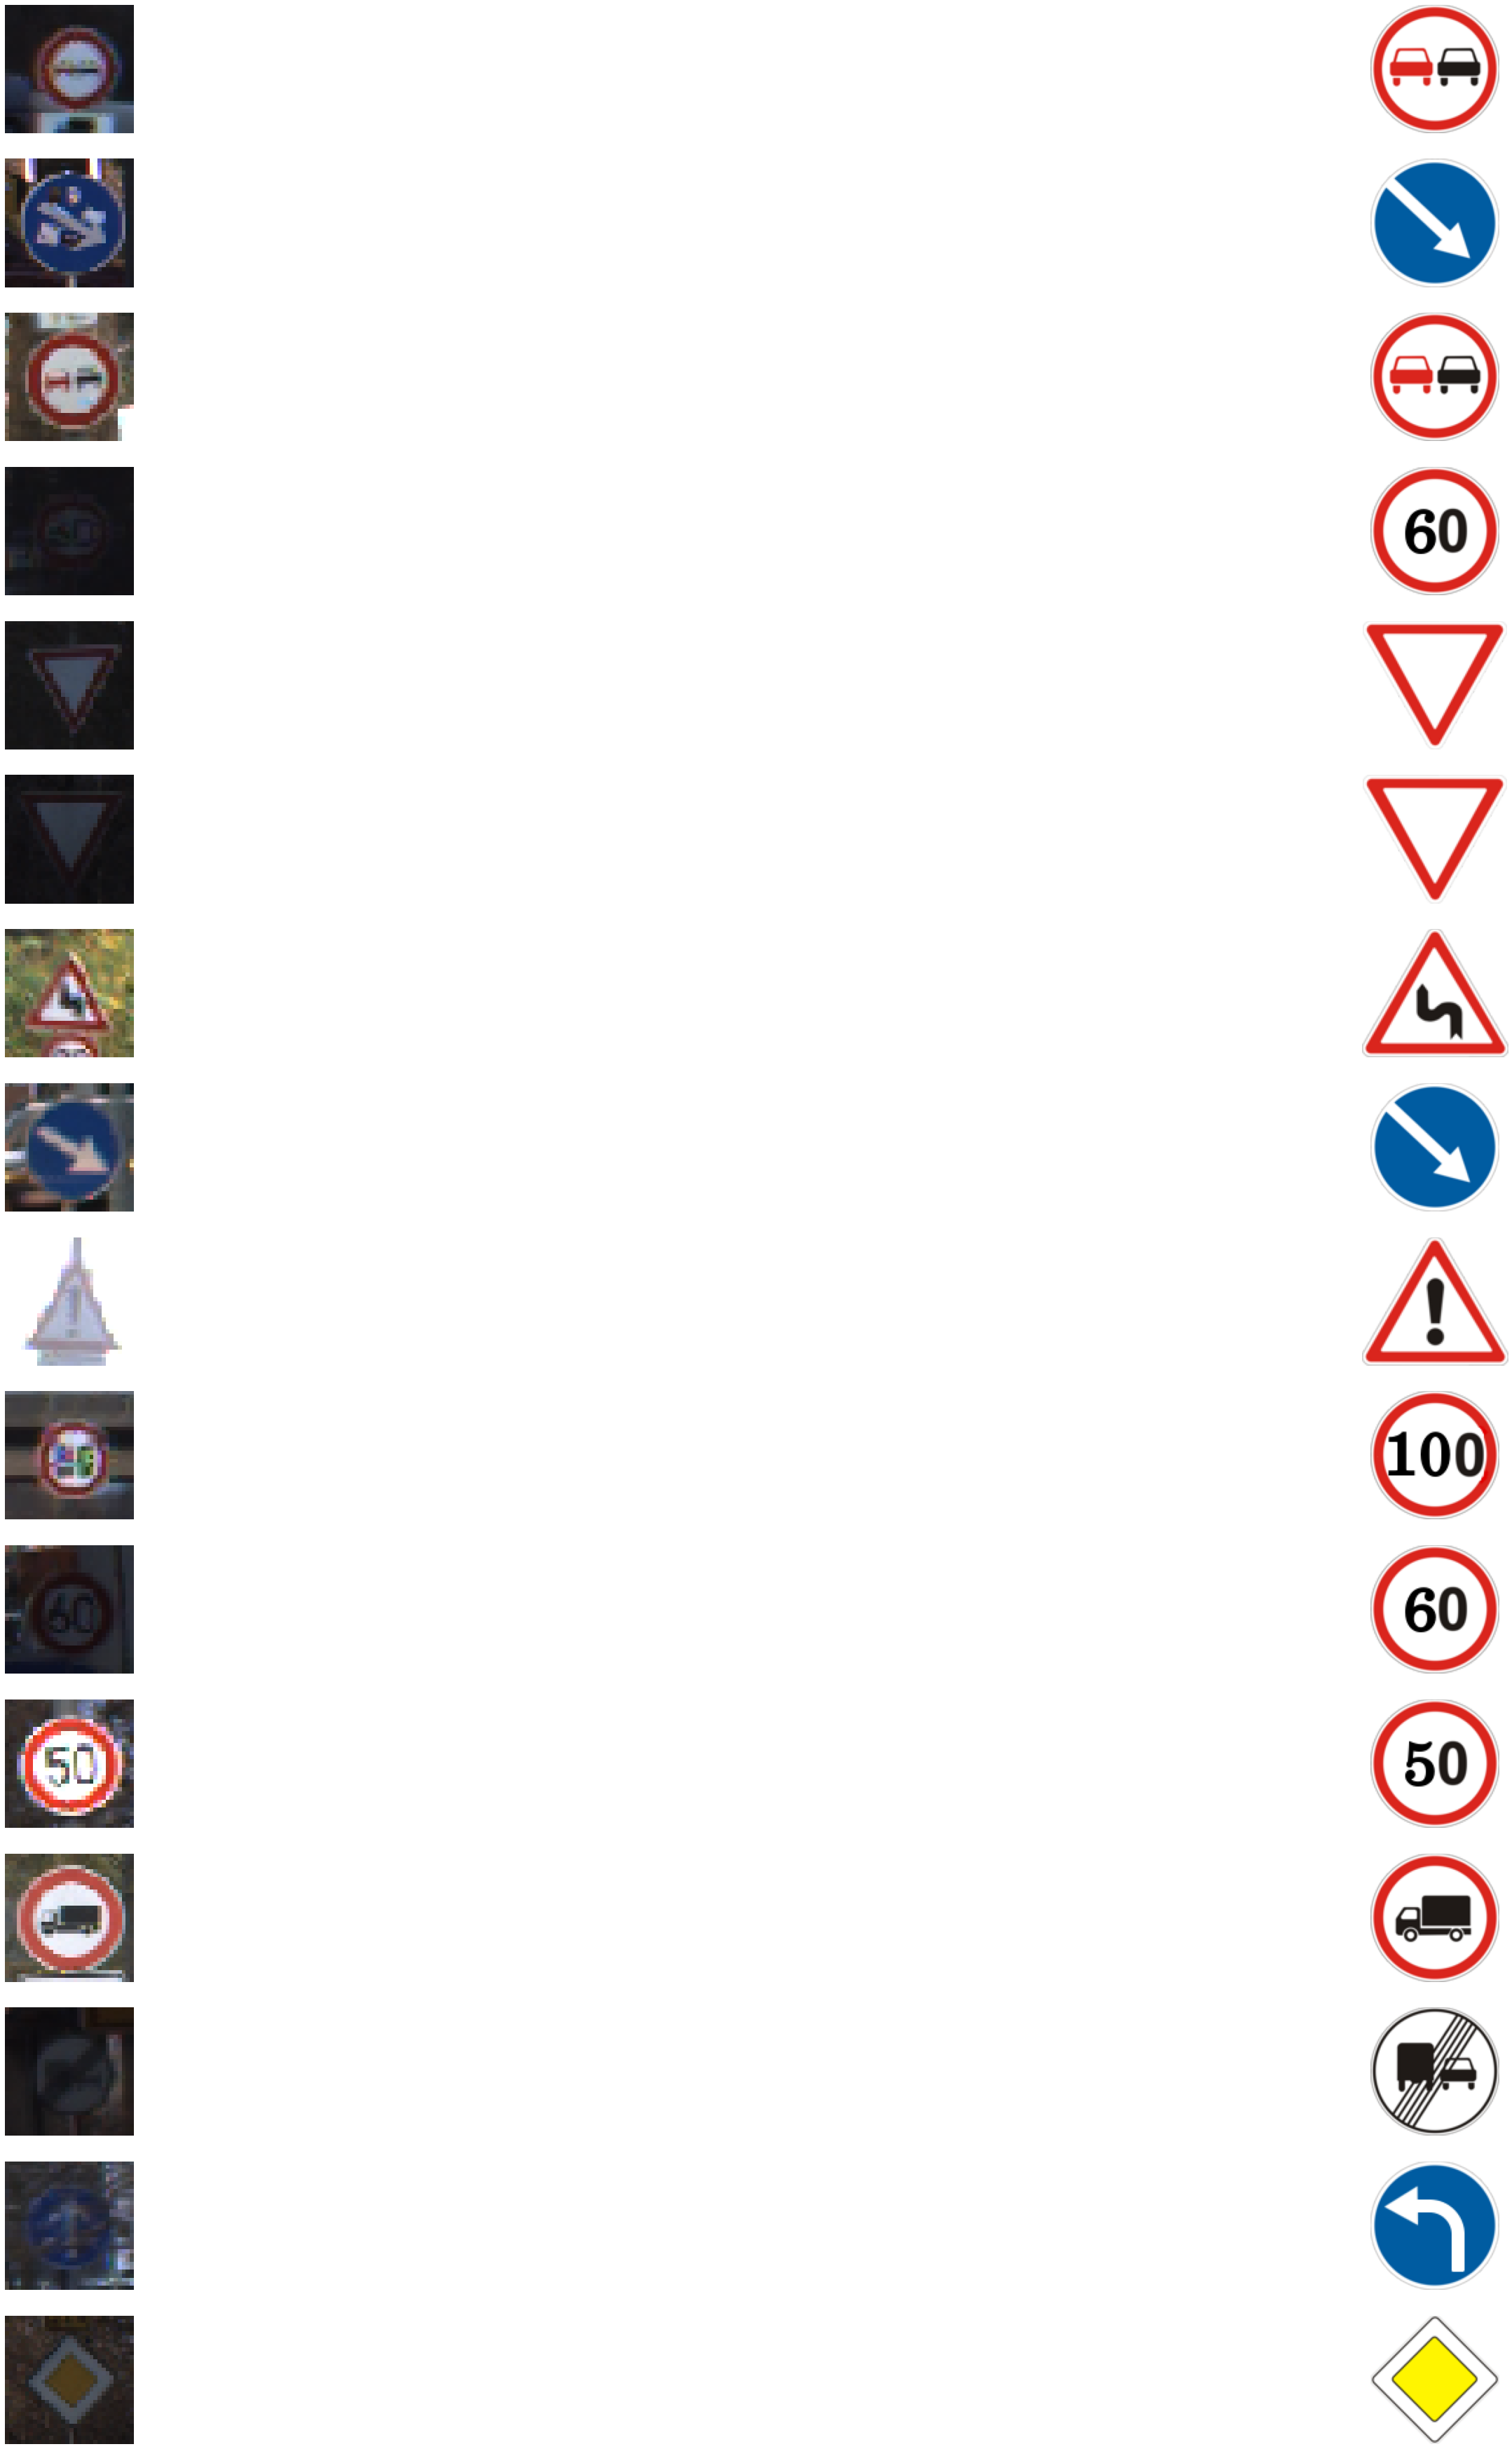

In [9]:
test_batch = 1
plt.figure(figsize=(64, 64))
plt.tight_layout()
for i in range(0, 16):
    plt.subplot(16, 2, 2 * i + 1), plt.axis('off')
    plt.imshow(testDataGenerator[test_batch][0][i])
    pre = model.predict(testDataGenerator[test_batch][0])
    classes_x=np.argmax(pre,axis=1)
    img = Image.open('E:\Documents\Programming Projects\Python\Trafic sign Deep Learning\Meta\\' + str(classes_x[i]) + '.png')
    plt.subplot(16, 2, 2 * i + 2), plt.axis('off')
    plt.imshow(img)